In [ ]:
import math
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

  windows= [ 30,60,90,120]
  quantiles=[25,75]
  min=[]
  max=[]
  median=[]
  top_q=[]
  bottom_q=[]
  realized=[]




In [ ]:
price_data=yf.download("JPM", start="2020-01-01", end="2022-01-01")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
def realized_vol_1(price_data, window=30):
  log = price_data['Close']/price_data['Close'].shift(1).apply(np.log)
  return log.rolling(window).std()*np.sqrt(252)


In [ ]:
def realized_vol_2(price_data, window=30):
    log_high_low = np.log(price_data['High'] / price_data['Low']) ** 2
    log_close_open = np.log(price_data['Close'] / price_data['Open']) ** 2
    return (0.5 * log_high_low - (2 * np.log(2) - 1) * log_close_open).rolling(window).sum() * np.sqrt(252)


In [ ]:
def realized_vol_3(price_data, window=30):
    term1 = np.log(price_data['High'] / price_data['Open']) * np.log(price_data['High'] / price_data['Close'])
    term2 = np.log(price_data['Low'] / price_data['Open']) * np.log(price_data['Low'] / price_data['Close'])
    return (term1 + term2).rolling(window).sum() * np.sqrt(252)


In [ ]:
def realized_vol_4(price_data, window=30):
    k = 0.34 / (1.34 + (window + 1) / window)
    log_open_close = np.log(price_data['Close'] / price_data['Open'])
    log_open_close_shift = np.log(price_data['Open'].shift(1) / price_data['Close'].shift(1))
    overnight_vol = log_open_close_shift ** 2
    rs_vol = realized_vol_5(price_data, window)
    return (overnight_vol + k * rs_vol).rolling(window).sum() * np.sqrt(252)


In [ ]:
method_names = {
    1: "Log Returns Volatility Model",
    2: "Garman-Klass Volatility Model",
    3: "Rogers-Satchell Volatility Model",
    4: "Yang-Zhang Volatility Model"
}

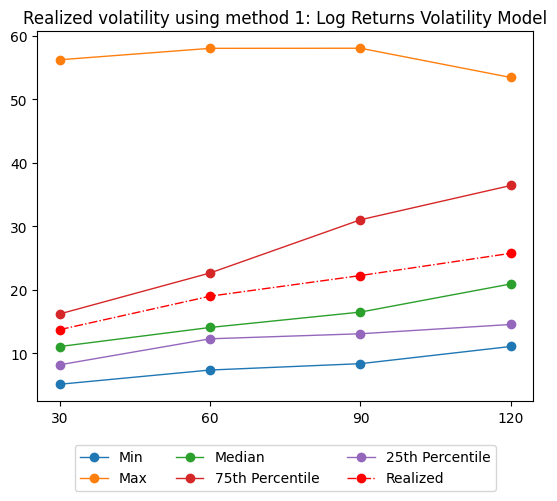

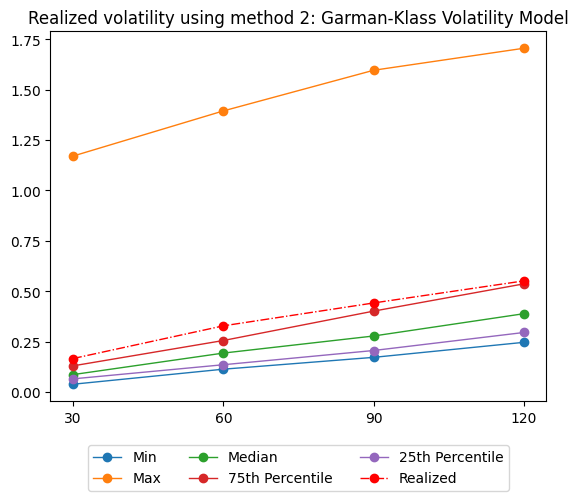

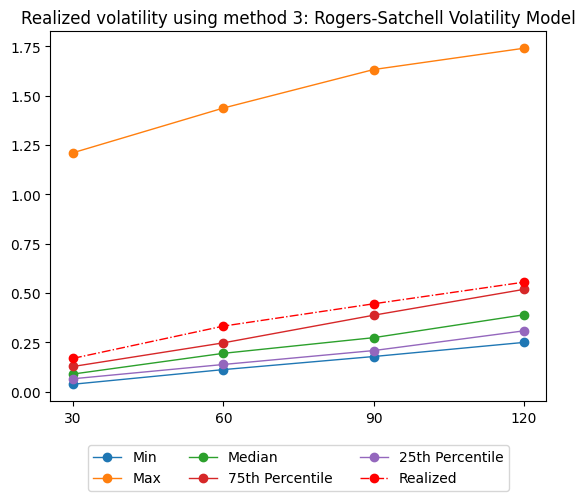

In [ ]:
for i in range(1, 4):
    min_ = []
    max_ = []
    median = []
    top_q = []
    bottom_q = []
    realized = []

    for window in windows:
        estimator = eval(f"realized_vol_{i}(price_data, window)")

        min_.append(estimator.min())
        max_.append(estimator.max())
        median.append(estimator.median())
        top_q.append(estimator.quantile(0.75))
        bottom_q.append(estimator.quantile(0.25))
        realized.append(estimator.mean())

    plt.plot(windows, min_, "-o", linewidth=1, label="Min")
    plt.plot(windows, max_, "-o", linewidth=1, label="Max")
    plt.plot(windows, median, "-o", linewidth=1, label="Median")
    plt.plot(windows, top_q, "-o", linewidth=1, label="75th Percentile")
    plt.plot(windows, bottom_q, "-o", linewidth=1, label="25th Percentile")
    plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

    plt.title(f"Realized volatility using method {i}: {method_names[i]}")
    plt.xticks(windows)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.show()
